In [1]:
import sys
import numpy as np
import matplotlib.pylab as plt

sys.path.insert(0,'..')
from src.black_scholes import assemble_black_scholes_matrix
from src.black_scholes import time_integrate_black_scholes

In [2]:
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# European capped symmetric power call

In this problem, we examine the application of the finite difference method to a European capped symmetric power call with payoff

$$
V(T, S) = \min \{L, \left(\left(S - K\right)^+\right)^p\}
$$

and $T, K, p, L > 0$. The value $V(t, S)$ of this option evolves according to the Black-Scholes equation

$$
\partial_t V(t, S) + \frac{\sigma^2}{2} S^2 \partial^2_S V(t, S) + r S \partial_S V(t, S) - r V(t, S) = 0, \quad S \in (0, \infty), \,\, t \in [0, T],
$$

with volatility $\sigma > 0$, risk-free rate $r > 0$, and the above terminal condition $V(T,S)$.

We will utilize a **finite difference method (FDM)** by performing a standard central spatial discretization coupled with a time integration method afterwards. For this we choose the explicit and implicit Euler method, as well as the tradpezoidal rule. In oder to start the process however, it is necessary to 

* truncate the domain $S \in (0, S_{\text{max}})$, and
* invert the time $t \in [0, T]$, as the payoff is a terminal condition.

## Option parameters

In [6]:
K = 100
L = 150
p = 1.2
r = 0.1
sigma = 0.05
T = 5

In [7]:
S_max = 300
m = 200
h = S_max / m

assert S_max > K + L ** (1 / p)

### Transformation and payoff function

In [8]:
f = lambda S: S * L / S_max
payoff = lambda S: np.minimum(L, np.maximum(S-K, 0)**p) - f(S)

### Time, space and initial datum

In [9]:
t = np.linspace(0, T, 10)
space = np.arange(1, m) * h
w0 = payoff(space)

### Compute numerical solutions 

In [10]:
sol_expl = time_integrate_black_scholes(t, w0, sigma, r, h, space, m, f, solver='explicit_euler')
sol_impl = time_integrate_black_scholes(t, w0, sigma, r, h, space, m, f, solver='implicit_euler')
sol_trapec = time_integrate_black_scholes(t, w0, sigma, r, h, space, m, f, solver='trapezoidal_rule')

## Plots

In [11]:
lbls = ['Explicit Euler', 'Implicit Euler', 'Trapezoidal Rule']
sols = np.stack((sol_expl, sol_impl, sol_trapec))

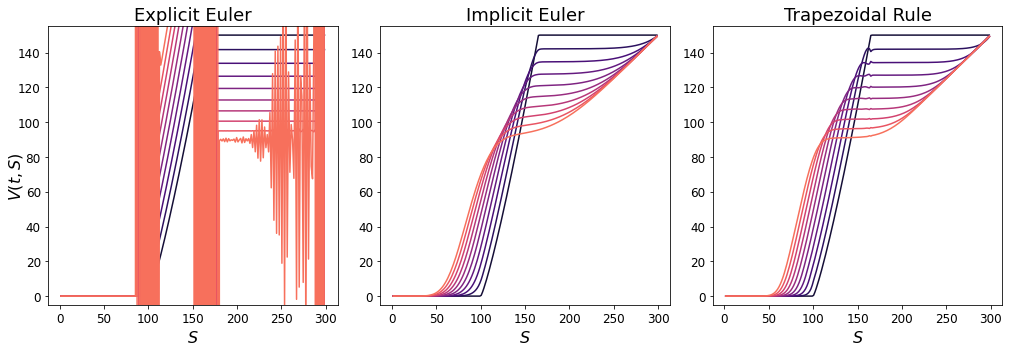

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(14,5))
plt.setp(axs, ylim=(-5, 155))
color=plt.cm.magma(np.linspace(.1, .7, len(t)))
for x, ax in enumerate(axs):
    for i in range(len(t)):
        ax.plot(space, sols[x][i], c=color[i], label=r'$t={:.1f}$'.format(t[::-1][i]))
    ax.set_title(lbls[x], size=18)
    ax.set_xlabel(r'$S$', size=16)
fig.text(0, 0.5, r'$V(t, S)$', va='center', rotation='vertical', size=16)
plt.tight_layout()

In [13]:
def plot_solution(space, time, sols, labels):
    colors = ['k', 'r', 'b', 'y']
    fig = plt.figure(figsize=(14,9))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(sols.shape[0]):
        ax.plot_wireframe(Space, Time, sols[i], lw=1.0, alpha=.9, color=colors[i], label=labels[i])
    ax.set_xlabel(r'$S$', fontsize=18)
    ax.set_ylabel(r'$t$', fontsize=18)
    ax.set_zlabel(r'$V(t, S)$', fontsize=18, rotation=90)
    ax.set_title('')
    ax.zaxis.set_rotate_label(False)
    ax.view_init(30, 240);
    ax.legend(fontsize=16);

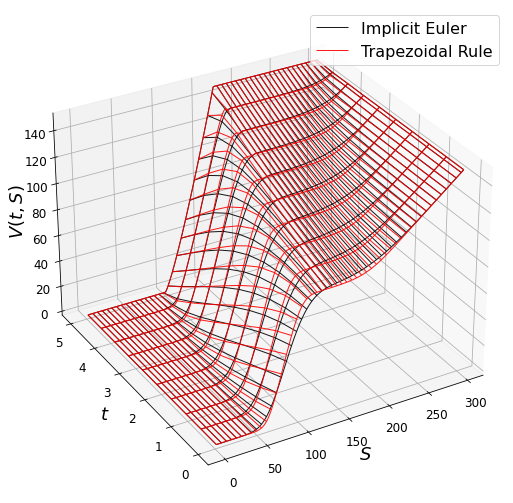

In [14]:
Space, Time = np.meshgrid(space, t[::-1])
plot_solution(Space, Time, sols[1:], lbls[1:])